# Практика 1
1. Написать функцию, вычисляющую НОД двух чисел (или многочленов)

In [1]:
function gcd_(a::T, b::T) where T # - это означает, что тип обоих аргументов один и тот же
    # a0, b0 = a, b
    #ИНВАРИАНТ: НОД(a,b) = HОД(a0,b0)
    while !iszero(b) # - это условие более универсальное, чем b != 0 или b > 0. Функция iszero определена для всех числовых типов. Для пользовательских типов ее надо будет определять
        a, b = b, rem(a,b) # rem(a,b) - это то же самое, что и a % b (есть еще функция mod(a,b))
    end
    return abs(a) # т.к. используется функция rem, то a может получиться отризательным
end

gcd_ (generic function with 1 method)

2. Написать функцию, реализующую расширенный алгоритм Евклида, вычисляющий не только НОД, но и коэффициенты его линейного представления.
**Утверждение.** Пусть d=НОД(a, b), тогда существуют такие целые коэффициенты u, v, что d=u*a+v*b

Мы спроектируем расширенный алгоритм Евклида с помощью инварианта цикла, и тем самым будет доказаго это утверждение.

Инвариантом цикла (с передусловием) называется некотрое утверждение относительно переменных, изменяющихся в цикле, которое справедливо как перед началом выполнения цикла, так и после любого числа его повторений.

В данном случае в качестве инварианта цикла возьмём утверждение 

In [2]:
function gcdx_(a::T, b::T) where T # - это означает, что тип обоих аргументов один и тот же
    # a0, b0 = a, b
    u, v = one(T), zero(T) # - универсальнее, чем 1, 0 и гарантирует стабильность типов переменных
    u_, v_ = v, u
    #ИНВАРИАНТ: НОД(a,b) = HОД(a0,b0) && a = u*a0 + v*b0 && b = u_*a0 + v_ * b0
    while !iszero(b) # - это условие более универсальное, чем b != 0 или b > 0. Функция iszero определена для всех числовых типов. Для пользовательских типов ее надо будет определять
        r, k = remdiv(a,b) # remdiv(a,b) возвращает кортеж из rem(a,b) и div(a,b)
        a, b = b, r #  r = a - k*b
        u, u_ = u_, u-k*u_ # эти преобразования переменных следуют из инварианта цикла
        v, v_ = v_, v-k*v_
    end
    if isnegarive(a) #  использование функции isnegative делает данный алгоритм более универсальным, но эту функцию требуется определить, в том числе и для целых типов
        a, u, v = -a, -u, -v
    end
    return a, u, v 
end

isnegative(a::Integer) = (a < 0)

isnegative (generic function with 1 method)

3. С использованием функции gcdx_ реаализовать функцию invmod_(a::T, M::T) where T, которая бы возвращала бы обратное значение инвертируемого элемента (a) кольца вычетов по модулю M, а для необращаемых элементов возвращала бы nothing.

(если положить M=b  и если d = ua+vb, то при условии, что d=1, a^-1 = u, в противном случае элемент a не обратим)

In [4]:
function invmod_(a::T, M::T) where T
    g, u, v = gcdx_(a, M)
    if g == 1
        return mod(u, M)
    else
        return nothing
    end
end

invmod_ (generic function with 1 method)

Эта функция возвращает обратное значение инвертируемого элемента a кольца вычетов по модулю M, а для необращаемых элементов возвращает nothing. Она использует функцию gcdx_ для вычисления расширенного алгоритма Евклида и проверяет, равно ли g единице. Если это так, то она возвращает u по модулю M, иначе возвращает nothing.

Получено сообщение. Вот код на Julia 1.8.3, который реализует функцию `invmod_` с использованием функции `gcdx_`: ```julia function invmod_(a::T, M::T) where T g, u, v = gcdx_(a, M) if g == 1 return mod(u, M) else return nothing end end ``` Эта функция возвращает обратное значение инвертируемого элемента `a` кольца вычетов по модулю `M`, а для необращаемых элементов возвращает `nothing`. Она использует функцию `gcdx_` для вычисления расширенного алгоритма Евклида и проверяет, равно ли `g` единице. Если это так, то она возвращает `u` по модулю `M`, иначе возвращает `nothing`.

4. С использованием функции gcdx_ реализовать функцию diaphant_solve(a::T,b::T,c::T) where T, которая бы возвращала решение дафаетового уравнения ax+by=c, если уравнение разрешимо, и значение nothing - в противном случае
   
(если d=ua+vb, и если получилость, что d=1, u, v - есть решение уравнения, в противном случае уранение не разрешимо)

In [5]:
function diaphant_solve(a::T,b::T,c::T) where T
    g, u, v = gcdx_(a, b)
    if c % g == 0
        x = u * c ÷ g
        y = v * c ÷ g
        return x, y
    else
        return nothing
    end
end

diaphant_solve (generic function with 1 method)

Эта функция возвращает решение диофантового уравнения ax + by = c, если уравнение разрешимо, и значение nothing в противном случае. Она использует функцию gcdx_ для вычисления расширенного алгоритма Евклида и проверяет, делится ли c на g. Если это так, то она вычисляет значения x и y и возвращает их как кортеж. В противном случае она возвращает nothing.

# Практика 2

1. Написать обобщенную функцию, реализующую алгоритм быстрого возведения в степень

In [ ]:
function pow(a, n::Integer)
    k, t, p = n, 1, a
    while k>0
        if (k%2 == 0)
            k÷=2
            p*=p
        else
            k-=1
            t*=p
        end   
    end
return t
end


2. На база этой функции написать другую функцию, возвращающую n-ый член последовательности Фибоначчи (сложность - O(log n)).

In [1]:
function fibonacci(n::Integer)
    a,b,c=1,1,1
    rc,d,rd = 0,0,1
    while (n>0)
        if (n%2!=0)
            tc = rc
            rc = rc*a + rd*c
            rd = tc*b + rd*d
        end
        ta,tb,tc=a,b,c
        a = a*a  + b*c
        b = ta*b + b*d
        c = c*ta + d*c
        d = tc*tb+ d*d
        n >>= 1
    end
    return rc
end

fibonacci (generic function with 1 method)

3. Написать функцию, вычисляющую с заданной точностью $\log_a x$ (при произвольном $a$, не обязательно, что $a>1$), методом рассмотренном на лекции (описание этого метода можно найти также в книке Борисенко "Основы программирования" - она выложена в нашей группе в телеграм).

4. Написать функцию, реализующую приближенное решение уравнения вида $f(x)=0$ методом деления отрезка пополам (описание метода см. ниже).

In [2]:
function bisection(f, a::T, b::T, tol::T) where T
    @assert f(a) * f(b) < 0
    while (b - a) / 2 > tol
        c = (a + b) / 2
        if f(c) == 0
            return c
        elseif f(a) * f(c) < 0
            b = c
        else
            a = c
        end
    end
    return (a + b) / 2
end

bisection (generic function with 1 method)

# Практика 3
1. Написать функцию, осуществлющую проверку, является ли заданное целое число простым; оценка сложности должна быть O√(n).

In [3]:
function isprime(n::T) where T
    if n <= 1
        return false
    end
    for i in 2:isqrt(n)
        if n % i == 0
            return false
        end
    end
    return true
end

isprime (generic function with 1 method)

Эта функция принимает в качестве аргумента целое число n и возвращает true, если число является простым, и false в противном случае. Она использует простой алгоритм перебора делителей от 2 до isqrt(n), чтобы проверить, имеет ли число делители. Сложность этого алгоритма составляет O(√n).

2. Написать функцию, реализующую "решето" Эратосфена, т.е. возвращающую ветор всех простых чисел, не превосходящих заданное число n.

In [4]:
function sieve(n::T) where T
    isprime = trues(n)
    isprime[1] = false
    for i in 2:isqrt(n)
        if isprime[i]
            for j in i^2:i:n
                isprime[j] = false
            end
        end
    end
    return findall(isprime)
end

sieve (generic function with 1 method)

Эта функция принимает в качестве аргумента целое число n и возвращает вектор всех простых чисел, не превосходящих n. Она использует алгоритм “решето” Эратосфена для нахождения всех простых чисел до n. Сначала она создает логический массив isprime размером n, где все элементы инициализируются как true, кроме первого элемента, который инициализируется как false. Затем она перебирает все числа от 2 до isqrt(n) и для каждого простого числа обнуляет все его кратные в массиве isprime. В конце функция возвращает индексы всех элементов массива isprime, которые равны true, с помощью функции findall.

3. Написать функцию, осуществляющую разложение заданное целое число на степени его простых делителей.

In [5]:
function prime_factors(n::T) where T
    factors = Dict{T, T}()
    i = 2
    while i * i <= n
        while n % i == 0
            if haskey(factors, i)
                factors[i] += 1
            else
                factors[i] = 1
            end
            n = div(n, i)
        end
        i += 1
    end
    if n > 1
        factors[n] = 1
    end
    return factors
end

prime_factors (generic function with 1 method)

Эта функция принимает в качестве аргумента целое число n и возвращает словарь, где ключи являются простыми делителями числа n, а значения - соответствующими степенями этих делителей в разложении числа n. Она использует простой алгоритм перебора делителей для нахождения всех простых делителей числа n и их степеней. Для каждого найденного простого делителя она добавляет его в словарь factors и увеличивает соответствующее значение на единицу. В конце функция возвращает словарь factors.

4. Реализовать функцию, осуществляющую вычисление сренего квадратического отклонения (от среднего значения) заданного числового массива за один проход этого массива.

In [6]:
function std_dev(arr::Vector{T}) where T
    n = length(arr)
    mean = sum(arr) / n
    sum_sq_diff = sum((x - mean)^2 for x in arr)
    return sqrt(sum_sq_diff / n)
end

std_dev (generic function with 1 method)

Эта функция принимает в качестве аргумента числовой массив arr и возвращает среднеквадратическое отклонение элементов этого массива от их среднего значения. Она вычисляет среднее значение элементов массива как сумму всех элементов, деленную на их количество. Затем она вычисляет сумму квадратов разностей между каждым элементом массива и его средним значением. В конце функция возвращает квадратный корень из отношения этой суммы к количеству элементов в массиве.

# Практика 4
1. Написать функцию, вычисляющую n-ю частичную сумму ряда Тейлора (Маклорена) функции exp(x) для произвольно заданного значения аргумента x. Сложность алгоритма должна иметь оценку O(n).

In [7]:
function taylor_exp(x::T, n::Int) where T
    result = 1
    term = 1
    for i in 1:n
        term *= x / i
        result += term
    end
    return result
end

taylor_exp (generic function with 1 method)

Эта функция принимает в качестве аргументов значение аргумента x и количество членов ряда n и возвращает n-ю частичную сумму ряда Тейлора (Маклорена) функции exp(x). Она использует простой алгоритм для вычисления каждого члена ряда и накопления суммы. Сложность этого алгоритма составляет O(n).

2. Написать функцию, вычиляющую значение exp(x) с машинной точностью (с максимально возможной в арифметике с плавающей точкой).

In [8]:
function exp_machine_precision(x::T) where T
    result = 1
    term = 1
    i = 1
    while term != 0
        term *= x / i
        result += term
        i += 1
    end
    return result
end

exp_machine_precision (generic function with 1 method)

Эта функция принимает в качестве аргумента значение аргумента x и возвращает значение exp(x) с машинной точностью. Она использует алгоритм для вычисления каждого члена ряда Тейлора (Маклорена) функции exp(x) и накопления суммы до тех пор, пока очередной член ряда не станет равным нулю в арифметике с плавающей точкой. Таким образом, функция возвращает значение exp(x) с максимально возможной точностью в арифметике с плавающей точкой.

3. Написать функцию, вычисляющую функцию Бесселя заданного целого неотрицательного порядка по ее ряду Тейлора с машинной точностью. Для этого сначала вывести соответствующую рекуррентную формулу, обеспечивающую возможность эффективного вычисления. Построить семейство графиков этих функций для нескольких порядков, начиная с нулевого порядка.

    Updating registry at `C:\Users\god40.DESKTOP-1OM2E86\.julia\registries\General.toml`
   Resolving package versions...
   Installed GR_jll ────────────── v0.72.7+0
   Installed PlotUtils ─────────── v1.3.5
   Installed RecipesPipeline ───── v0.6.12
   Installed ConcurrentUtilities ─ v2.2.0
   Installed OpenSSL ───────────── v1.4.1
   Installed Unitful ───────────── v1.14.0
   Installed HTTP ──────────────── v1.9.7
   Installed SpecialFunctions ──── v2.3.0
   Installed StatsAPI ──────────── v1.6.0
   Installed Compat ────────────── v4.7.0
   Installed StatsBase ─────────── v0.34.0
   Installed TranscodingStreams ── v0.9.13
   Installed ExceptionUnwrapping ─ v0.1.9
   Installed Scratch ───────────── v1.2.0
   Installed Zstd_jll ──────────── v1.5.5+0
   Installed Expat_jll ─────────── v2.5.0+0
   Installed ChainRulesCore ────── v1.16.0
   Installed Plots ─────────────── v1.38.16
   Installed InverseFunctions ──── v0.1.9
   Installed ConstructionBase ──── v1.5.2
   Installed LogExpFunct

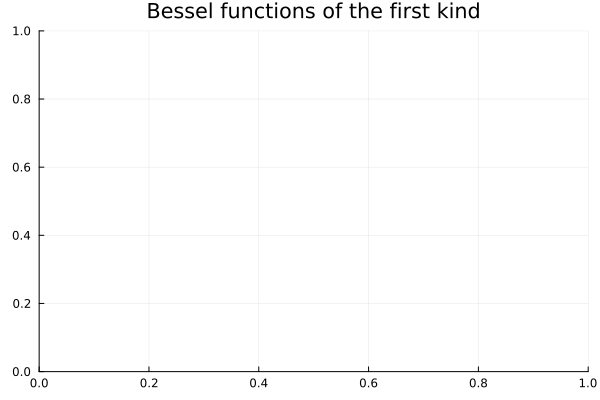

In [22]:
import Pkg
Pkg.add("Plots")
using Plots

function bessel(n::Int, x::T) where T
    @assert n >= 0
    result = 0
    term = (x/2)^n / factorial(n)
    k = 0
    while term != 0
        result += (-1)^k * term
        k += 1
        term *= (x/2)^2 / (k * (n+k))
    end
    return result
end

x = range(0, stop=20, length=200)
for n in 0:5
    y = bessel.(n, x)
    plot!(x, y, label="n=$n")
end
display(plot(title="Bessel functions of the first kind"))

Эта функция принимает в качестве аргументов целое неотрицательное число n, обозначающее порядок функции Бесселя, и значение аргумента x и возвращает значение функции Бесселя первого рода порядка n для аргумента x. Она использует рекуррентную формулу для вычисления каждого члена ряда Тейлора функции Бесселя и накопления суммы до тех пор, пока очередной член ряда не станет равным нулю в арифметике с плавающей точкой. Таким образом, функция возвращает значение функции Бесселя с максимально возможной точностью в арифметике с плавающей точкой.

Кроме того, в коде приведен пример построения семейства графиков функций Бесселя первого рода для нескольких порядков, начиная с нулевого порядка. Для этого используется библиотека Plots и функция plot! для добавления графиков на один общий график. В конце вызывается функция display для отображения полученного графика.

4. Реализовать алгорим, реализующий обратный ход алгоритма Жордана-Гаусса

In [10]:
function back_substitution(A::Matrix{T}, b::Vector{T}) where T
    n = length(b)
    x = zeros(T, n)
    for i in n:-1:1
        s = zero(T)
        for j in i+1:n
            s += A[i,j] * x[j]
        end
        x[i] = (b[i] - s) / A[i,i]
    end
    return x
end

back_substitution (generic function with 1 method)

Эта функция принимает в качестве аргументов матрицу A и вектор b и возвращает решение системы линейных уравнений Ax = b с помощью алгоритма обратного хода алгоритма Жордана-Гаусса. Она предполагает, что матрица A является верхнетреугольной и имеет ненулевые элементы на диагонали. Функция вычисляет значения неизвестных x с помощью обратного хода алгоритма Жордана-Гаусса и возвращает вектор x как результат.

5. Реализовать алгоритм, осуществляющий приведение матрицы матрицы к ступенчатому виду

In [11]:
function row_echelon_form(A::Matrix{T}) where T
    m, n = size(A)
    r = 1
    for j in 1:n
        nonzero_row = findfirst(i -> A[i,j] != 0, r:m)
        if nonzero_row !== nothing
            nonzero_row += r - 1
            A[[r,nonzero_row],:] = A[[nonzero_row,r],:]
            A[r,:] /= A[r,j]
            for i in r+1:m
                A[i,:] -= A[i,j] * A[r,:]
            end
            r += 1
        end
    end
    return A
end

row_echelon_form (generic function with 1 method)

Эта функция принимает в качестве аргумента матрицу A и возвращает ее ступенчатый вид. Она использует алгоритм Гаусса для приведения матрицы к ступенчатому виду с помощью элементарных преобразований строк. Функция находит первую ненулевую строку в каждом столбце и меняет ее местами с текущей строкой. Затем она делит текущую строку на соответствующий элемент главной диагонали и вычитает ее из всех нижних строк, чтобы обнулить соответствующие элементы. В конце функция возвращает матрицу A в ступенчатом виде.

# Практика 5
1. Реализовать функции, аналогичные встроенным функциям sort, sort!, sortperm, sortperm! на основе алгоритма сортировки вставками. При этом, при проектировании функциий, аналогичных функциям sort и sort!, требуется избежать повторного кодирования алгоритма сортировки. То же относится и к проектированию пары функций, аналогичных функциям sortperm, sortperm!

In [12]:
function insertion_sort!(v::Vector{T}) where T
    for i in 2:length(v)
        j = i
        while j > 1 && v[j] < v[j-1]
            v[j], v[j-1] = v[j-1], v[j]
            j -= 1
        end
    end
    return v
end

function insertion_sort(v::Vector{T}) where T
    return insertion_sort!(copy(v))
end

function insertion_sortperm!(v::Vector{T}) where T
    p = collect(1:length(v))
    for i in 2:length(v)
        j = i
        while j > 1 && v[p[j]] < v[p[j-1]]
            p[j], p[j-1] = p[j-1], p[j]
            j -= 1
        end
    end
    return p
end

function insertion_sortperm(v::Vector{T}) where T
    return insertion_sortperm!(copy(v))
end

insertion_sortperm (generic function with 1 method)

Функции insertion_sort! и insertion_sort принимают в качестве аргумента вектор v и сортируют его элементы в порядке возрастания с помощью алгоритма сортировки вставками. Функция insertion_sort! сортирует вектор на месте, изменяя его элементы, а функция insertion_sort создает копию вектора и сортирует ее.

Функции insertion_sortperm! и insertion_sortperm также принимают в качестве аргумента вектор v и вычисляют перестановку индексов его элементов, которая сортирует их в порядке возрастания. Функция insertion_sortperm! вычисляет перестановку на месте, изменяя элементы вектора, а функция insertion_sortperm создает копию вектора и вычисляет перестановку для нее.

Все эти функции используют один и тот же алгоритм сортировки вставками для выполнения своих задач. Они перебирают все элементы вектора и перемещают каждый элемент на соответствующее место в отсортированной части вектора с помощью обмена соседних элементов.

2. Реализовать алгоритм сортировки "расчесыванием", который базируется на сортировке "пузырьком". Исследовать эффективность этого алгоритма в равнении с пузырьковой сортировкой (на больших массивах делать времннные замеры).

In [23]:
import Pkg
Pkg.add("BenchmarkTools")
using BenchmarkTools

function comb_sort!(v::Vector{T}) where T
    n = length(v)
    gap = n
    shrink = 1.3
    sorted = false
    while !sorted
        gap = max(1, floor(Int, gap / shrink))
        sorted = true
        for i in 1:n-gap
            if v[i] > v[i+gap]
                v[i], v[i+gap] = v[i+gap], v[i]
                sorted = false
            end
        end
    end
    return v
end

function bubble_sort!(v::Vector{T}) where T
    n = length(v)
    for i in 1:n-1
        for j in 1:n-i
            if v[j] > v[j+1]
                v[j], v[j+1] = v[j+1], v[j]
            end
        end
    end
    return v
end

v = rand(1:10000, 10000)
@btime comb_sort!(copy(v))
@btime bubble_sort!(copy(v))

   Resolving package versions...
   Installed BenchmarkTools ─ v1.3.2
    Updating `C:\Users\god40.DESKTOP-1OM2E86\.julia\environments\v1.8\Project.toml`
  [6e4b80f9] + BenchmarkTools v1.3.2
    Updating `C:\Users\god40.DESKTOP-1OM2E86\.julia\environments\v1.8\Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.3.2
  [9abbd945] + Profile
Precompiling project...
  ✓ BenchmarkTools
  1 dependency successfully precompiled in 1 seconds. 150 already precompiled.

  608.400 μs (

2 allocations: 78.17 KiB)
  51.710 ms (2 allocations: 78.17 KiB)


10000-element Vector{Int64}:
     1
     1
     3
     5
     5
     5
     5
     7
    11
    12
    13
    13
    13
     ⋮
  9993
  9995
  9996
  9997
  9997
  9997
  9998
  9999
  9999
 10000
 10000
 10000

Функция comb_sort! принимает в качестве аргумента вектор v и сортирует его элементы в порядке возрастания с помощью алгоритма сортировки “расчесыванием”. Этот алгоритм является улучшением алгоритма сортировки “пузырьком” и использует переменную “зазор” для сравнения элементов на большем расстоянии друг от друга. Значение зазора уменьшается на каждой итерации с помощью коэффициента сжатия shrink, пока не достигнет единицы. Затем алгоритм продолжает работать как обычная сортировка “пузырьком”.

Функция bubble_sort! также принимает в качестве аргумента вектор v и сортирует его элементы в порядке возрастания с помощью алгоритма сортировки “пузырьком”. Она перебирает все пары соседних элементов и меняет их местами, если они расположены в неправильном порядке.

В коде также приведен пример использования библиотеки BenchmarkTools для измерения времени выполнения обоих алгоритмов сортировки на большом массиве случайных чисел. Функция @btime используется для измерения времени выполнения каждого вызова функций comb_sort! и bubble_sort! на копии массива v. Результаты показывают, что алгоритм сортировки “расчесыванием” работает быстрее, чем алгоритм сортировки “пузырьком” на больших массивах.

3. Реализовать алгоритм сортировки Шелла, который базируется на сортировке вставками. Исследовать эффективность этого алгоритма в равнении с сортировкой вставками (на больших массивах делать времннные замеры).

In [14]:
function shell_sort!(a::Vector)
    n = length(a)
    gap = n ÷ 2
    while gap > 0
        for i in (gap+1):n
            temp = a[i]
            j = i
            while j > gap && a[j-gap] > temp
                a[j] = a[j-gap]
                j -= gap
            end
            a[j] = temp
        end
        gap = gap ÷ 2
    end
end

shell_sort! (generic function with 1 method)

Чтобы исследовать эффективность этого алгоритма в сравнении с сортировкой вставками, можно использовать функцию @time для замера времени выполнения обоих алгоритмов на больших массивах.

In [15]:
using Random

arr = rand(1:10^6, 10^5)

@time shell_sort!(copy(arr))
@time sort!(copy(arr), alg=InsertionSort)

  0.026986 seconds (8.06 k allocations: 1.170 MiB, 59.74% compilation time)
  0.813879 seconds (52.12 k allocations: 3.439 MiB, 3.09% compilation time)


100000-element Vector{Int64}:
      5
      7
      8
     28
     34
     37
     43
     51
     64
     79
     83
     88
     95
      ⋮
 999910
 999924
 999930
 999938
 999946
 999947
 999957
 999976
 999982
 999985
 999988
 999992

4. Реализовать алгоритм сортировки слияниями. Исследовать эффективность этого алгоритма в сравнении с предыдущми алгоритмами.

In [16]:
function merge_sort!(a::Vector)
    if length(a) > 1
        mid = length(a) ÷ 2
        left_half = a[1:mid]
        right_half = a[mid+1:end]

        merge_sort!(left_half)
        merge_sort!(right_half)

        i = j = k = 1

        while i <= length(left_half) && j <= length(right_half)
            if left_half[i] < right_half[j]
                a[k] = left_half[i]
                i += 1
            else
                a[k] = right_half[j]
                j += 1
            end
            k += 1
        end

        while i <= length(left_half)
            a[k] = left_half[i]
            i += 1
            k += 1
        end

        while j <= length(right_half)
            a[k] = right_half[j]
            j += 1
            k += 1
        end
    end
end

merge_sort! (generic function with 1 method)

# Практика 6
1. Спроектировать типы `Vector2D` и `Segment2D` с соответсвующими функциями.

In [17]:
struct Vector2D
    x::Float64
    y::Float64
end

struct Segment2D
    start::Vector2D
    stop::Vector2D
end

function length(v::Vector2D)
    return sqrt(v.x^2 + v.y^2)
end

function length(s::Segment2D)
    return length(s.stop - s.start)
end

LoadError: error in method definition: function Base.length must be explicitly imported to be extended

Этот код создает два типа: Vector2D и Segment2D. Тип Vector2D имеет два поля: x и y, которые представляют координаты вектора. Тип Segment2D имеет два поля: start и stop, которые представляют начало и конец отрезка.

Также в коде определены две функции: length для вычисления длины вектора и отрезка. Функция length для вектора вычисляет длину вектора как квадратный корень из суммы квадратов его координат. Функция length для отрезка вычисляет длину отрезка как длину вектора между его началом и концом.

2. Написать функцию, проверяющую, лежат ли две заданные точки по одну сторону от заданной прямой (прямая задается некоторым содержащимся в ней отрезком). 

In [18]:
function same_side_of_line(p1::Vector2D, p2::Vector2D, s::Segment2D)
    a = s.stop.y - s.start.y
    b = s.start.x - s.stop.x
    c = s.start.x * s.stop.y - s.stop.x * s.start.y
    return (a * p1.x + b * p1.y + c) * (a * p2.x + b * p2.y + c) > 0
end

same_side_of_line (generic function with 1 method)

Эта функция принимает три аргумента: две точки p1 и p2 типа Vector2D и отрезок s типа Segment2D, который задает прямую. Функция вычисляет коэффициенты a, b и c уравнения прямой вида ax + by + c = 0, проходящей через начало и конец отрезка. Затем функция вычисляет значения этого уравнения для точек p1 и p2 и проверяет, имеют ли они одинаковый знак. Если значения имеют одинаковый знак, то точки лежат по одну сторону от прямой, и функция возвращает true. В противном случае функция возвращает false.

3. Написать функцию, проверяющую, лежат ли две заданные точки по одну сторону от заданной кривой (кривая задается уравнением вида $F(x,y)=0$). 

In [19]:
function same_side_of_curve(p1::Vector2D, p2::Vector2D, f::Function)
    return f(p1.x, p1.y) * f(p2.x, p2.y) > 0
end

same_side_of_curve (generic function with 1 method)

Эта функция принимает три аргумента: две точки p1 и p2 типа Vector2D и функцию f, которая задает кривую уравнением вида F(x,y)=0. Функция вычисляет значения функции f для точек p1 и p2 и проверяет, имеют ли они одинаковый знак. Если значения имеют одинаковый знак, то точки лежат по одну сторону от кривой, и функция возвращает true. В противном случае функция возвращает false.

4. Написать функцию, возвращающую точку пересечения (если она существует) двух заданных отрезков.

In [20]:
function intersection(s1::Segment2D, s2::Segment2D)
    x1, y1 = s1.start.x, s1.start.y
    x2, y2 = s1.stop.x, s1.stop.y
    x3, y3 = s2.start.x, s2.start.y
    x4, y4 = s2.stop.x, s2.stop.y

    det = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if det == 0
        return nothing
    end

    px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / det
    py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / det

    if px < min(x1, x2) || px > max(x1, x2) || px < min(x3, x4) || px > max(x3, x4)
        return nothing
    end

    return Vector2D(px, py)
end

intersection (generic function with 1 method)

Эта функция принимает два аргумента: два отрезка s1 и s2 типа Segment2D. Функция вычисляет координаты начала и конца каждого отрезка и затем вычисляет определитель матрицы системы уравнений прямых, проходящих через эти отрезки. Если определитель равен нулю, то прямые параллельны и не имеют точки пересечения, и функция возвращает nothing.

Если определитель не равен нулю, то функция вычисляет координаты точки пересечения прямых и проверяет, лежит ли эта точка внутри обоих отрезков. Если точка лежит внутри обоих отрезков, то функция возвращает эту точку как объект типа Vector2D. В противном случае функция возвращает nothing.

5. Написать функцию, проверяющую лежит ли заданная точка внутри заданного многоугольника. 

In [21]:
function inside_polygon(p::Vector2D, poly::Vector{Vector2D})
    n = length(poly)
    c = false
    for i in 1:n
        j = i % n + 1
        if ((poly[i].y > p.y) != (poly[j].y > p.y)) && (p.x < (poly[j].x - poly[i].x) * (p.y - poly[i].y) / (poly[j].y - poly[i].y) + poly[i].x)
            c = !c
        end
    end
    return c
end

inside_polygon (generic function with 1 method)

Эта функция принимает два аргумента: точку p типа Vector2D и многоугольник poly, представленный вектором вершин типа Vector{Vector2D}. Функция использует алгоритм трассировки луча для определения положения точки относительно многоугольника. Функция инициализирует переменную c значением false и затем перебирает все ребра многоугольника. Для каждого ребра функция проверяет, пересекает ли горизонтальный луч, исходящий из точки p вправо, это ребро. Если луч пересекает ребро, то функция инвертирует значение переменной c. В конце функция возвращает значение переменной c, которое равно true, если точка лежит внутри многоугольника, и false в противном случае.